Importando as Bibliotecas

In [33]:
import math
import matplotlib.pyplot as plt
import numpy as np

Declarando variaveis e iniciando as lists que serão usadas para plotar as figuras

In [34]:
pIy = 0.0 
pIx = 0.0

g = 9.81

x = 0.00
y = 0.00

Y = []
X = []

rX = []
rY = []

Velocidade 

In [35]:
def V(v0, t , a):
  return v0 + t * a

Definindo a função para a componente X da velocidade que depende de v0 que é a velocidade inicial e ang que é o ângulo, ambos são fornecidos pelo usuário.

In [36]:
def v_x(v0, ang):
  return v0 * math.cos(ang)

Definindo a função para a componente Y da velocidade quando t = 0 que depende de v0 que é a velocidade inicial e ang que é o ângulo, ambos são fornecidos pelo usuário.

In [37]:

def v_y(v0, ang):
  return v0 * math.sin(ang)



Definindo a função para a componente Y da velocidade quando  que depende de v0 que é a velocidade inicial, ang que é o ângulo, ambos são fornecidos pelo usuário, depende da força de aceleração da gravidade e do instante de tempo t

In [38]:
def speedY(v0, grav, time, ang):
  return v0 * math.sin(ang) - (grav * time)

Definindo as posiçoes de X que depende da posição inicial p0_x da velocidade na componente X e do tempo


In [39]:
def pos_X(p0_x, v_x, time):
  return p0_x + (v_x * time)

Definindo as posiçoes de Y que depende da posição inicial p0_y da velocidade na componente Y, do tempo e da gravidade


In [40]:
def pos_Y(p0_y, v_y, time, grav):
  return p0_y + (v_y * time) - ((grav * (time ** 2))/2)

Resultante da Velocidade total

In [41]:
def v_T(v_x, v_y):
  return (math.sqrt(v_x ** 2  + v_y ** 2))

Definimos a função para retornar o ângulo instantâneo

In [42]:
def anguloInst(vY, vX):
  return math.atan(vY/vX)

## Força resistiva
  D coeficente de arrasto de um objeto nesse caso 0.47 pois é uma esfera,
  P que é a densidade do ar,
  A que é a área de seção transversal,
  V que é a velocidade do projétil




In [43]:
def forRes(d=0.47, p=1.225, a=0.8, v=0.0):
    res = 0.5 * d * p * a * (v ** 2)
    return res

Definindo as componentes da aceleração no eixo X e Y, no eixo X depende da força resistiva da massa e do ângulo, ja em Y depende também da gravidade

In [44]:
def aX(R, M, ang):
    return -(R * np.cos(ang))/M

def aY(R = 0.0, M = 0.0, G = 9.81, ang = 0.0):
    return -G-(R * np.sin(ang))/M

Inputs iniciais

In [45]:
angulo = float(input("Escolha um ângulo inicial:"))
v0 = float(input("Digite a velocidade inicial:"))
massa = float(input("Digite a massa do objeto:"))
angulo = math.radians(angulo)
anguloI = angulo


Construindo tabela das variavéis

In [46]:

  
vx = v_x(v0, angulo)
vy = v_y(v0, angulo)
r = forRes(v = v0)
ax = aX(r, massa, angulo)
ay = aY(R = r, M = massa, ang = angulo)

print("\nTempo    Pos_X   Pos_Y    Vel_Y     Vel_X    VTotal    A_X    A_Y    Angulo\n")
print("---------------------------------------------------------------------------\n")

#tabela
for i in np.linspace(0, 0.10,dtype=float,num=10):
    t = i

    ag = angulo 

    vy = V(vy, t, ay)
    vx = V(vx, t, ax)

    p_X = pos_X(pIx, vx, t)
    p_Y = pos_Y(pIy, v_y(v0, ag), t, g)

    VT = v_T(vx, vy)

    r = forRes(v = VT)

    ax = aX(r, massa, ag)
    ay = aY(R = r, M = massa, ang = ag)
    
    if p_Y < 0:
      break
    
    ag = np.degrees(ag)    
    angulo = anguloInst(vy, vx)

    print(f"{t: .2f}   {p_X: .2f}   {p_Y: .2f}   {vy: .2f}    {vx: .2f}   {VT: .2f}   {ax: .2f}   {ay: .2f}   {ag: .2f}\n")



Tempo    Pos_X   Pos_Y    Vel_Y     Vel_X    VTotal    A_X    A_Y    Angulo

---------------------------------------------------------------------------

 0.00    0.00    0.00    12.22     4.45    13.00   -1.33   -13.47    70.00

 0.01    0.05    0.14    12.07     4.43    12.85   -1.30   -13.39    70.00

 0.02    0.10    0.27    11.77     4.40    12.57   -1.25   -13.22    69.83

 0.03    0.15    0.40    11.33     4.36    12.14   -1.19   -12.99    69.49

 0.04    0.19    0.53    10.75     4.31    11.58   -1.11   -12.69    68.95

 0.06    0.24    0.66    10.05     4.25    10.91   -1.02   -12.35    68.16

 0.07    0.28    0.78    9.22     4.18    10.12   -0.92   -11.98    67.09

 0.08    0.32    0.89    8.29     4.11    9.25   -0.81   -11.61    65.63

 0.09    0.36    1.00    7.26     4.03    8.30   -0.71   -11.23    63.65

 0.10    0.40    1.09    6.14     3.96    7.30   -0.60   -10.88    60.93



Construindo grafico sem arrasto

In [47]:
angulo = anguloI
vx = v_x(v0, angulo)
vy = v_y(v0, angulo)
r = forRes(v = v0)
ax = aX(r, massa, angulo)
ay = aY(R = r, M = massa, ang = angulo)

#Grafico sem arrasto
for j in np.linspace(0, 4,dtype=float,num=50):
    t = j

    vy = speedY(v0, g, t, angulo) 
    vx = v_x(v0, angulo)

    p_X = pos_X(pIx, vx, t)
    p_Y = pos_Y(pIy, v_y(v0, angulo), t, g)
    
    X.append(p_X)
    Y.append(p_Y)

    VT = v_T(vx, vy)

    angulo = anguloInst(vy, vx)
    if p_Y < 0:
      break


    angulo = anguloI
    x = 0
    y = 0 
    vRx = v_x(v0, angulo)
    vRy = v_y(v0, angulo)

Construindo Grafico com arrasto

In [48]:

#Grafico com arrasto
for k in np.linspace(0, 0.10,dtype=float,num=50):
    t = k

    vRx = V(vRx, t, ax)
    vRy = V(vRy, t, ay)

    x = x + t * vRx
    y = y + t * vRy
    
    VT = v_T(vRx, vRy)
    r = forRes(v = VT)

    ax = aX(r, massa, angulo)
    ay = aY(R = r, M = massa, ang = angulo)

    rX.append(x)
    rY.append(y)

    if y < 0:
      break
  




Transformando as lists em arrays para plotarmos

In [49]:
X = np.array(X)
Y = np.array(Y)
rX = np.array(rX)
rY = np.array(rY)


Plotando as curvas com e sem arrasto

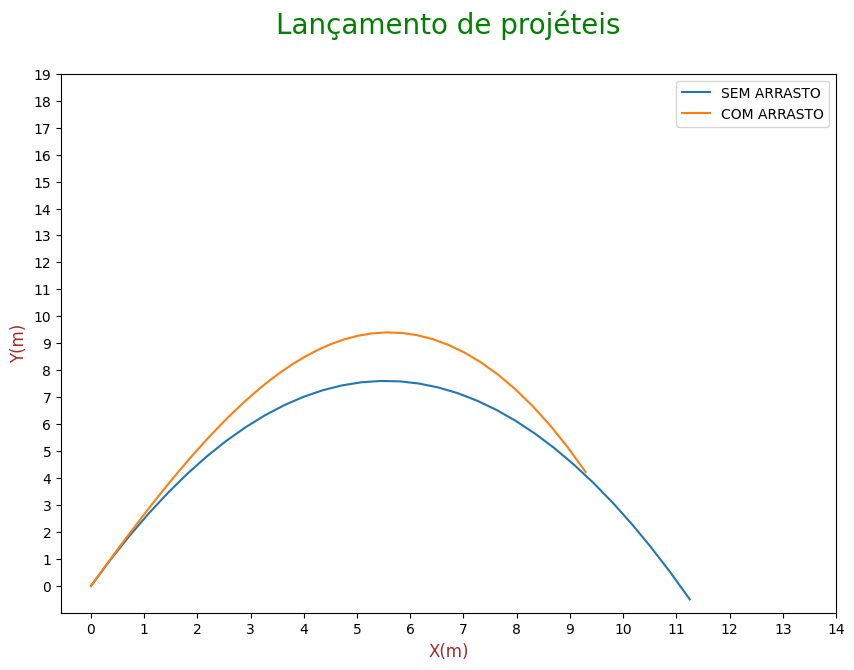

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
ax.plot(X, Y,  label = "SEM ARRASTO")
ax.plot(rX, rY, label = "COM ARRASTO")

ax.set_title("Lançamento de projéteis\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
ax.set_xlabel("X(m)", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
ax.set_ylabel("Y(m)", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
ax.legend()

plt.xticks(range(0, 15))
plt.yticks(range(0, 20, 1))
plt.show()